# Custom Zimbabwe Base Model - Calibrate to 2020

In this file the objectives are as follows: 

1. See what the default model produces under different conditions:  
  a) without any calibration, when the country location and population size is specified only  
  b) when I adapt the number of contacts to be manicaland numbers  
  c) when I adapt the beta value  


2. Establish which callibration is the most effective for Zimbabwe: 
This will only happen very roughly here to try to get the number of cases and deaths within the right orders of magnitude for the country. Following this, in a separate program I can run Optuna or EMA workbench to figure out the exact number of contacts/beta values required at each point


3. Output results: 
So I can compare back under each set of circumstances

All of these will be run against the calibration data in the calibration_data folder on cases and deaths between 20th March 2020 and 1st Sept 2020


## 0. Import required packages

In [34]:
import covasim as cv
import numpy as np
import seaborn as sns
import pandas as pd
import sciris as sc

In [35]:
pwd

'/Users/sophieayling/Documents/GitHub/covasim/my_countries/ZIM/notebooks'

## Import case data for calibration

In [36]:
# import the data
df_cases = pd.read_excel('../calibration_data/national_cases_by_day.xlsx')
df_deaths = pd.read_stata('../calibration_data/national_deaths_by_day.dta')

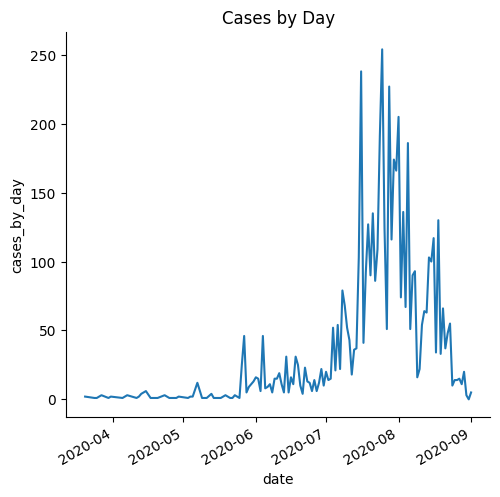

In [37]:
#take a look at it 
g = sns.relplot(x="date", y="cases_by_day", kind="line", data=df_cases).set(title="Cases by Day")
g.fig.autofmt_xdate()

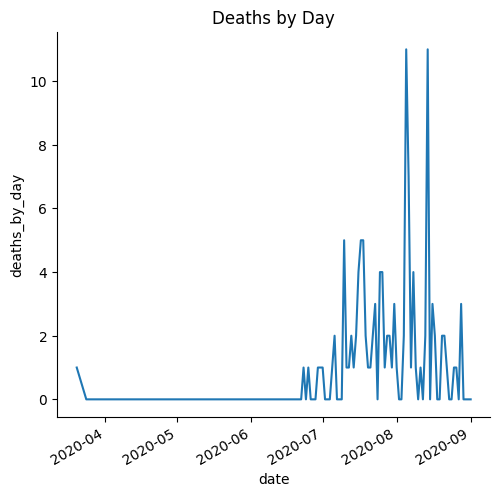

In [38]:
g = sns.relplot(x="date", y="deaths_by_day", kind="line", data=df_deaths).set(title="Deaths by Day")
g.fig.autofmt_xdate()

## Scenario A See what default model produces  - only country location and pop size specified

In [39]:
pars = sc.objdict(
    pop_type = 'hybrid', # see documentation - this is a hybrid between random and a data derived model. Later, develop synthpop
    pop_size = 100e3,  # population of the Zim is 15 million. When I despecify this -- population default is again 20k 
    pop_scale= 15, # one agent represents 15 people 
    location = 'Zimbabwe',
    start_day = '2020-03-20',
    end_day = '2020-09-01',
    beta = 0.015,
    verbose = 0 # means it won't print all the output 
)


### Take a look at population characteristics from input data (of country (location) as defined above)
Nb. These are the same for every scenario

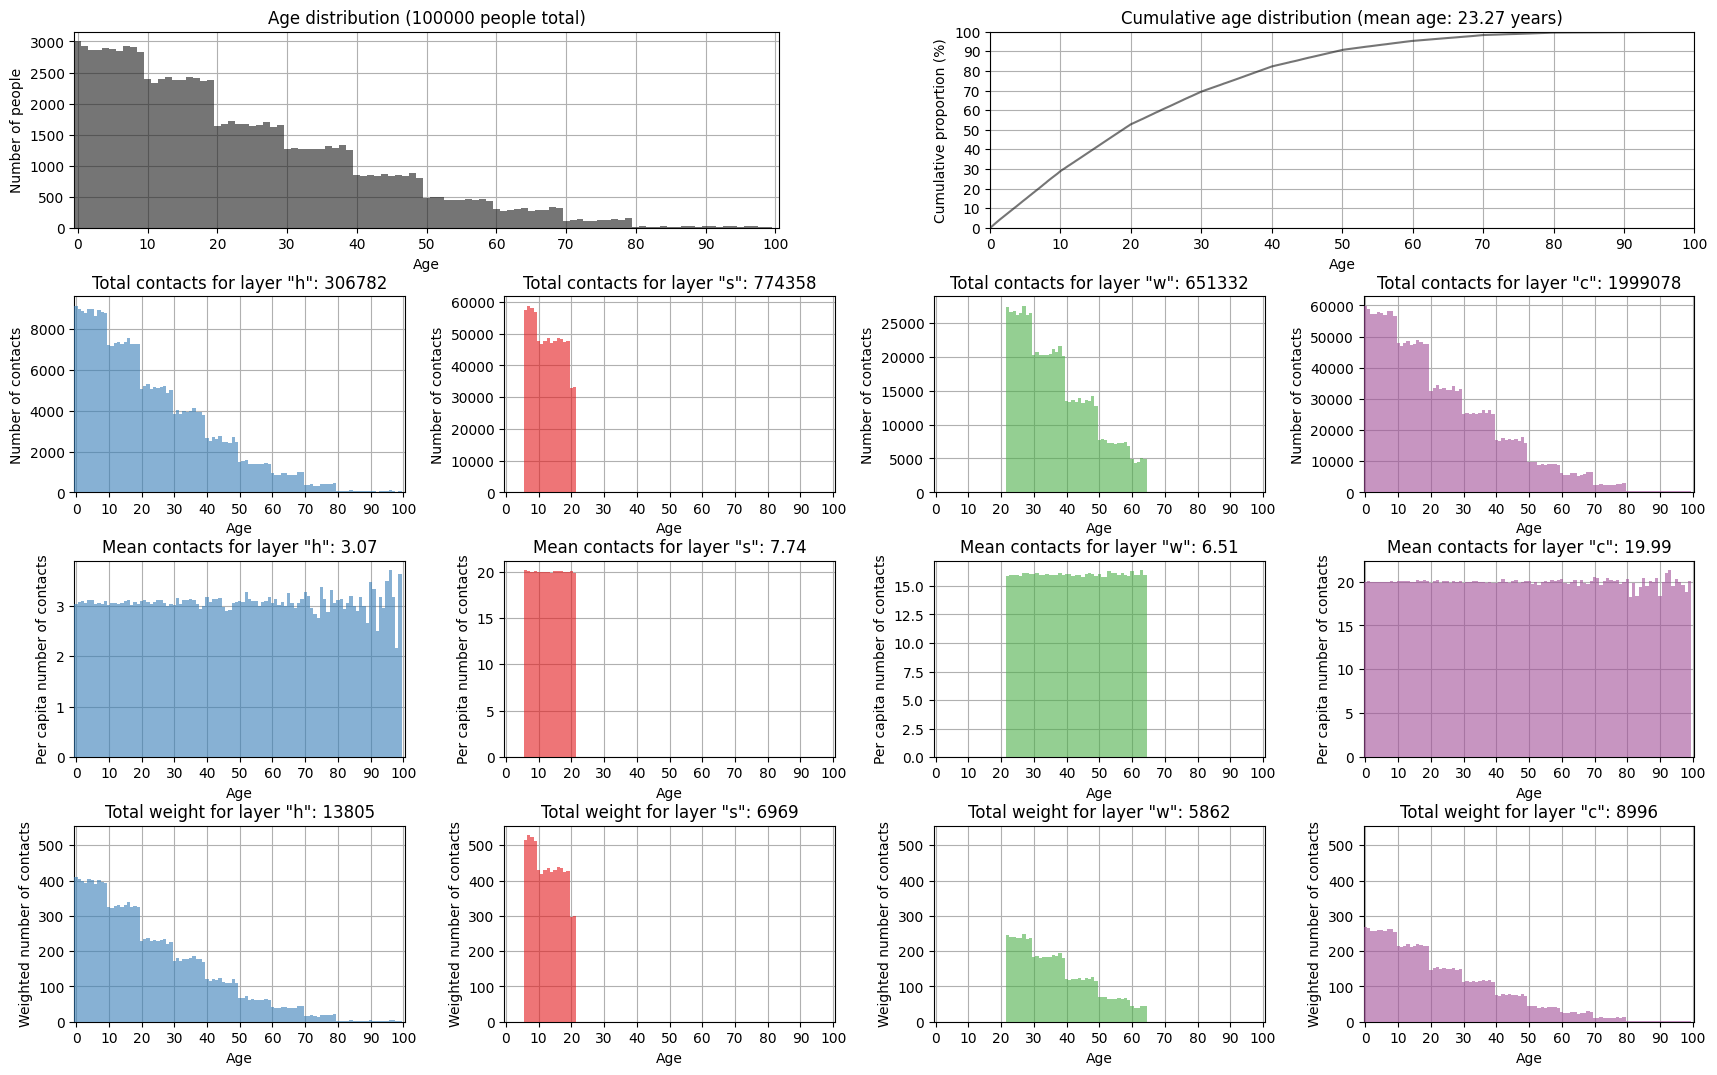

In [40]:
cv.options.set(dpi=100, show=False, close=True) #, verbose=0 # ) # put back in verbose once i've figured out what this does

sim = cv.Sim(pars=pars, datafile = '../calibration_data/national_cases_by_day.xlsx')
sim.initialize()
fig = sim.people.plot()

# average age is 23.27 years

In [42]:
# Bring in data for calibration 
df = pd.read_csv('../calibration_data/zim_calibration_covasim_format.csv')
print(df)

          date  new_diagnoses  new_deaths
0    20mar2020              2           1
1    24mar2020              1           0
2    25mar2020              1           0
3    27mar2020              3           0
4    30mar2020              1           0
..         ...            ...         ...
129  28aug2020             11           3
130  29aug2020             20           0
131  30aug2020              3           0
132  31aug2020              0           0
133  01sep2020              5           0

[134 rows x 3 columns]


  Automatically adding cumulative column cum_diagnoses from new_diagnoses
  Automatically adding cumulative column cum_deaths from new_deaths
Initializing sim with 20000 people for 165 days
  Running 2020-03-20 ( 0/165) (0.59 s)  ———————————————————— 1%
  Running 2020-03-30 (10/165) (0.65 s)  •——————————————————— 7%
  Running 2020-04-09 (20/165) (0.71 s)  ••—————————————————— 13%
  Running 2020-04-19 (30/165) (0.78 s)  •••————————————————— 19%
  Running 2020-04-29 (40/165) (0.85 s)  ••••———————————————— 25%
  Running 2020-05-09 (50/165) (0.94 s)  ••••••—————————————— 31%
  Running 2020-05-19 (60/165) (1.08 s)  •••••••————————————— 37%
  Running 2020-05-29 (70/165) (1.20 s)  ••••••••———————————— 43%
  Running 2020-06-08 (80/165) (1.29 s)  •••••••••——————————— 49%
  Running 2020-06-18 (90/165) (1.36 s)  ••••••••••—————————— 55%
  Running 2020-06-28 (100/165) (1.43 s)  ••••••••••••———————— 61%
  Running 2020-07-08 (110/165) (1.49 s)  •••••••••••••——————— 67%
  Running 2020-07-18 (120/165)

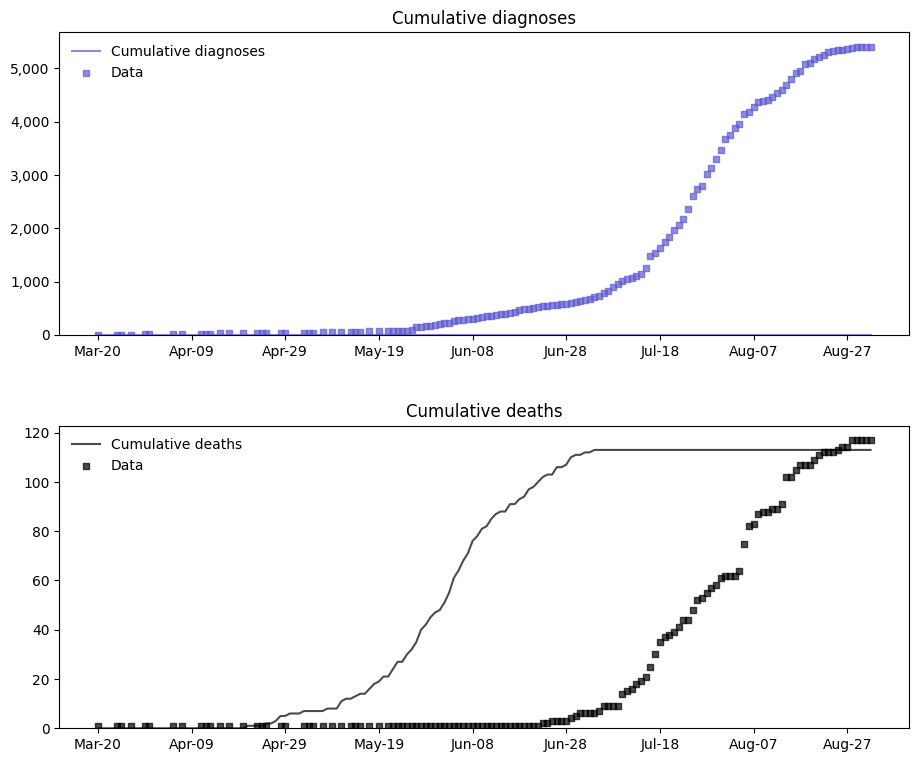

In [46]:
pars = dict(
        start_day = '2020-03-20',
        end_day = '2020-09-01',
)

sim = cv.Sim(pars=pars, datafile='../calibration_data/zim_calibration_covasim_format.csv', analyzers=cv.age_histogram())
sim.run()
sim.plot(to_plot=['cum_diagnoses', 'cum_deaths'])

In [50]:
# we can see that cumulative diagnoses match well, but cumulative deaths happened later than was anticipated

fit = sim.compute_fit()
print(fit.mismatches)
print(fit.mismatch)

#0: cum_deaths.    528.0341880341881
#1: cum_diagnoses. 203.033105233956
731.0672932681441


Initializing sim (resetting people) with 20000 people for 165 days
  Running 2020-03-20 ( 0/165) (0.01 s)  ———————————————————— 1%
  Running 2020-03-30 (10/165) (0.15 s)  •——————————————————— 7%
  Running 2020-04-09 (20/165) (0.23 s)  ••—————————————————— 13%
  Running 2020-04-19 (30/165) (0.31 s)  •••————————————————— 19%
  Running 2020-04-29 (40/165) (0.39 s)  ••••———————————————— 25%
  Running 2020-05-09 (50/165) (0.49 s)  ••••••—————————————— 31%
  Running 2020-05-19 (60/165) (0.63 s)  •••••••————————————— 37%
  Running 2020-05-29 (70/165) (0.75 s)  ••••••••———————————— 43%
  Running 2020-06-08 (80/165) (0.85 s)  •••••••••——————————— 49%
  Running 2020-06-18 (90/165) (0.93 s)  ••••••••••—————————— 55%
  Running 2020-06-28 (100/165) (1.00 s)  ••••••••••••———————— 61%
  Running 2020-07-08 (110/165) (1.07 s)  •••••••••••••——————— 67%
  Running 2020-07-18 (120/165) (1.15 s)  ••••••••••••••—————— 73%
  Running 2020-07-28 (130/165) (1.22 s)  •••••••••••••••————— 79%
  Running 2020-08-07 

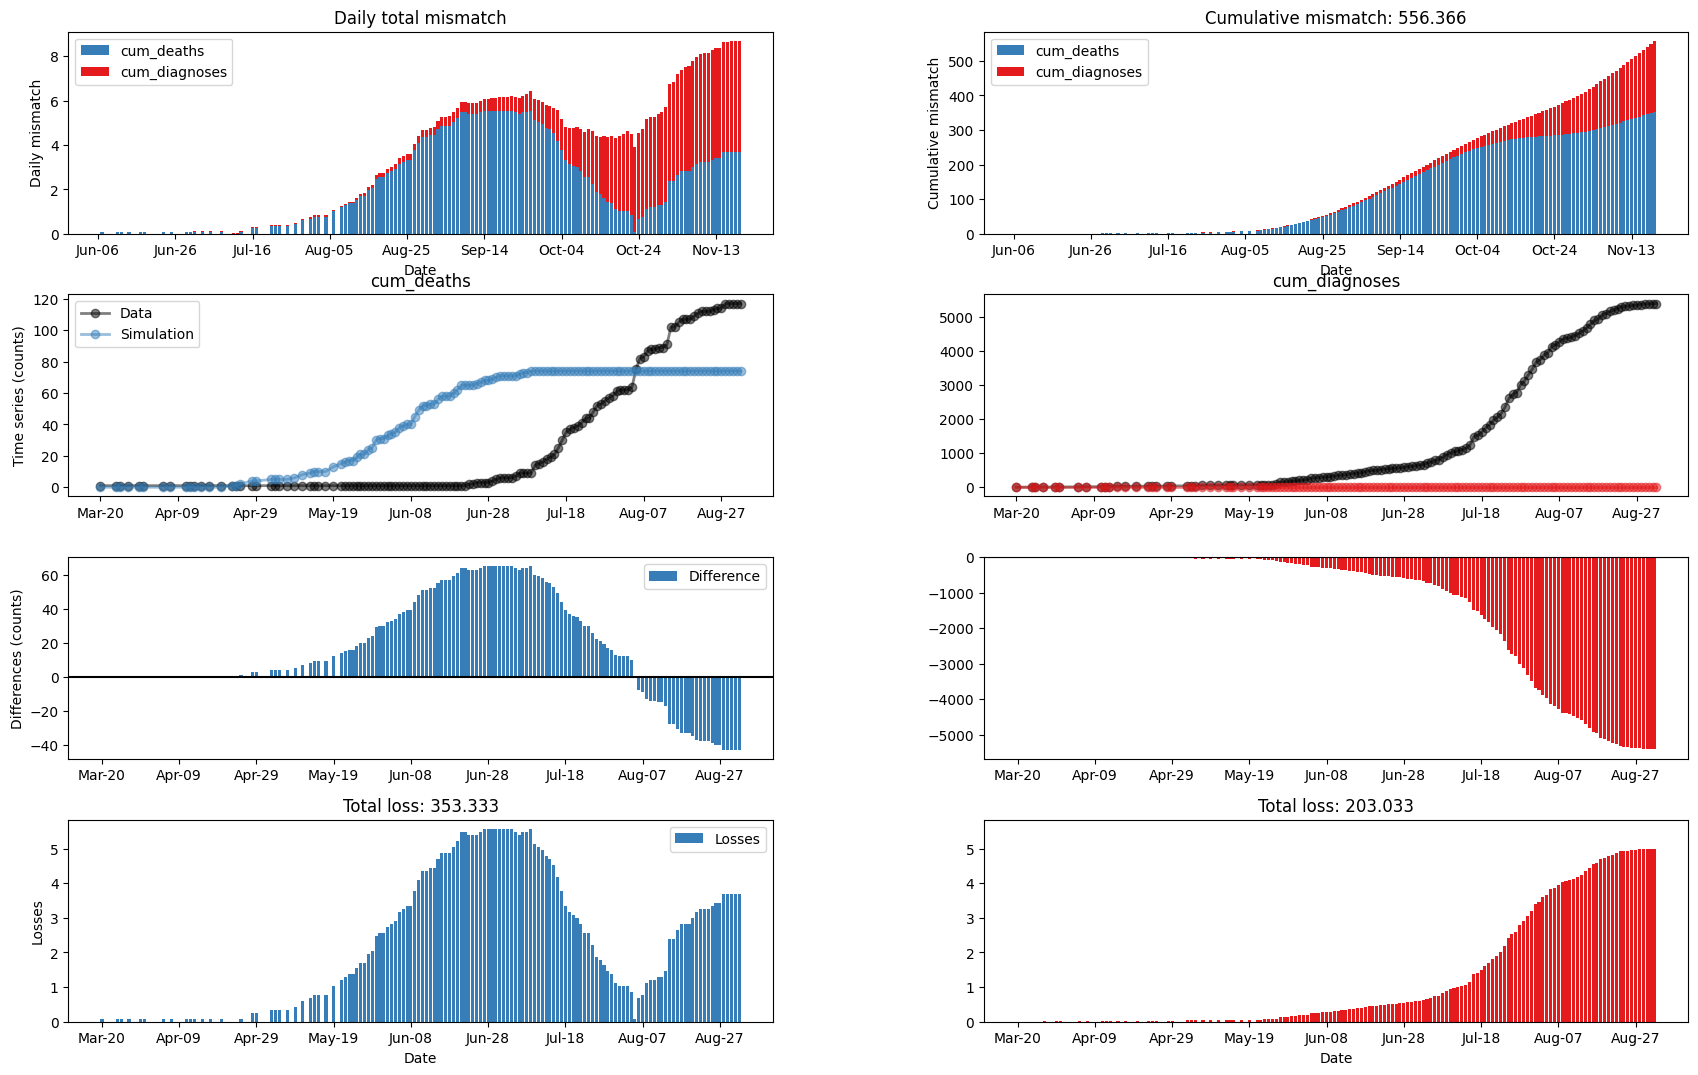

In [51]:
sim['rel_death_prob'] = .75 # see what happens if we reduce the death rate by *.75
sim. initialize(reset=True) # reinitialize the sim 

# rerun and compute the fit
sim.run()
fit = sim.compute_fit()

# output 
sim.plot()
fit.plot()
print(fit.mismatches)
print(fit.mismatch)

## Using SciPy

In [54]:
# try the scipy approach
import scipy
def objective(x, n_runs=10):
    print(f'Running sim for beta={x[0]}, rel_death_prob={x[1]}')
    pars = dict(
        pop_size       = 10_000,
        start_day      = '2020-02-01',
        end_day        = '2020-04-11',
        beta           = x[0],
        rel_death_prob = x[1],
        verbose        = 0,
    )
    sim = cv.Sim(pars=pars, datafile='../calibration_data/zim_calibration_covasim_format.csv')
    msim = cv.MultiSim(sim)
    msim.run(n_runs=n_runs)
    mismatches = []
    for sim in msim.sims:
        fit = sim.compute_fit()
        mismatches.append(fit.mismatch)
    mismatch = np.mean(mismatches)
    return mismatch

guess = [0.015, 1] # Initial guess of parameters -- beta and relative death probability
pars = scipy.optimize.minimize(objective, x0=guess, method='nelder-mead') # Run the optimization

Running sim for beta=0.015, rel_death_prob=1.0
Running sim for beta=0.01575, rel_death_prob=1.0
Running sim for beta=0.015, rel_death_prob=1.05
Running sim for beta=0.014249999999999999, rel_death_prob=1.0499999999999998
Running sim for beta=0.013499999999999998, rel_death_prob=1.0749999999999997
Running sim for beta=0.013499999999999998, rel_death_prob=1.0249999999999997
Running sim for beta=0.012749999999999997, rel_death_prob=1.0124999999999997
Running sim for beta=0.011249999999999996, rel_death_prob=1.0874999999999995
Running sim for beta=0.009374999999999994, rel_death_prob=1.1312499999999992
Running sim for beta=0.008624999999999994, rel_death_prob=1.0687499999999992
Running sim for beta=0.006187499999999992, rel_death_prob=1.065624999999999
Running sim for beta=0.0028124999999999886, rel_death_prob=1.1843749999999984
Running sim for beta=-0.002156250000000016, rel_death_prob=1.2703124999999975
Running sim for beta=-0.0003750000000000142, rel_death_prob=1.1187499999999981
Runnin

## Using Optuna

In [58]:
'''
Example for running built-in calibration with Optuna
'''

import sciris as sc


# Create default simulation
pars = sc.objdict(
    pop_type = 'hybrid', # see documentation - this is a hybrid between random and a data derived model. Later, develop synthpop
    pop_size = 100e3,  # population of the Zim is 15 million. When I despecify this -- population default is again 20k 
    pop_scale= 15, # one agent represents 15 people 
    location = 'Zimbabwe',
    start_day = '2020-03-20',
    end_day = '2020-09-01',
    beta = 0.015,
    rel_death_prob = 1.0,
    verbose = 0 # means it won't print all the output 
)

sim = cv.Sim(pars=pars, datafile='../calibration_data/zim_calibration_covasim_format.csv')



# Parameters to calibrate -- format is best, low, high
calib_pars = dict(
    beta           = [pars.beta, 0.005, 0.20],
    rel_death_prob = [pars.rel_death_prob, 0.5, 3.0],
)

if __name__ == '__main__':

    # Run the calibration
    n_trials = 25
    n_workers = 4
    calib = sim.calibrate(calib_pars=calib_pars, n_trials=n_trials, n_workers=n_workers)

Removed existing calibration covasim_calibration.db


[I 2021-06-01 12:32:59,291] A new study created in RDB with name: covasim_calibration
[I 2021-06-01 12:33:21,462] Trial 0 finished with value: 18328.16131036217 and parameters: {'beta': 0.06342558965761072, 'rel_death_prob': 1.1522105523455013}. Best is trial 0 with value: 18328.16131036217.
[I 2021-06-01 12:33:21,601] Trial 2 finished with value: 32856.36643856729 and parameters: {'beta': 0.04851289052157689, 'rel_death_prob': 1.9935626949539558}. Best is trial 0 with value: 18328.16131036217.
[I 2021-06-01 12:33:21,684] Trial 1 finished with value: 27459.44336164422 and parameters: {'beta': 0.03786961413495782, 'rel_death_prob': 1.7154049063097778}. Best is trial 0 with value: 18328.16131036217.
[I 2021-06-01 12:33:22,100] Trial 3 finished with value: 29045.084387285242 and parameters: {'beta': 0.1955818927891325, 'rel_death_prob': 1.7195595429532302}. Best is trial 0 with value: 18328.16131036217.
[I 2021-06-01 12:33:41,955] Trial 4 finished with value: 33193.97327617413 and paramet

[I 2021-06-01 12:38:58,502] Trial 77 finished with value: 419.61039962720196 and parameters: {'beta': 0.009934650439119232, 'rel_death_prob': 2.0669373271863964}. Best is trial 77 with value: 419.61039962720196.
[I 2021-06-01 12:39:02,538] Trial 78 finished with value: 16197.818937712593 and parameters: {'beta': 0.018661459059403, 'rel_death_prob': 2.105983722638551}. Best is trial 77 with value: 419.61039962720196.
[I 2021-06-01 12:39:03,055] Trial 79 finished with value: 3872.2638744647256 and parameters: {'beta': 0.017900261306085137, 'rel_death_prob': 0.5021748560370439}. Best is trial 77 with value: 419.61039962720196.
[I 2021-06-01 12:39:07,477] Trial 80 finished with value: 4058.759600960451 and parameters: {'beta': 0.017479733934038483, 'rel_death_prob': 0.5613776760522766}. Best is trial 77 with value: 419.61039962720196.
[I 2021-06-01 12:39:16,385] Trial 81 finished with value: 17925.974648684216 and parameters: {'beta': 0.01978594782306757, 'rel_death_prob': 1.86620982879754

Calibration for 100 total trials completed in 445.8 s.

Initial parameter values:
#0: beta.           0.015
#1: rel_death_prob. 1.0

Best parameter values:
#0: beta.           0.009511342869651331
#1: rel_death_prob. 2.089102329775232

Mismatch before calibration: 5296.75
Mismatch after calibration:  348.792
Percent improvement:         93.4%


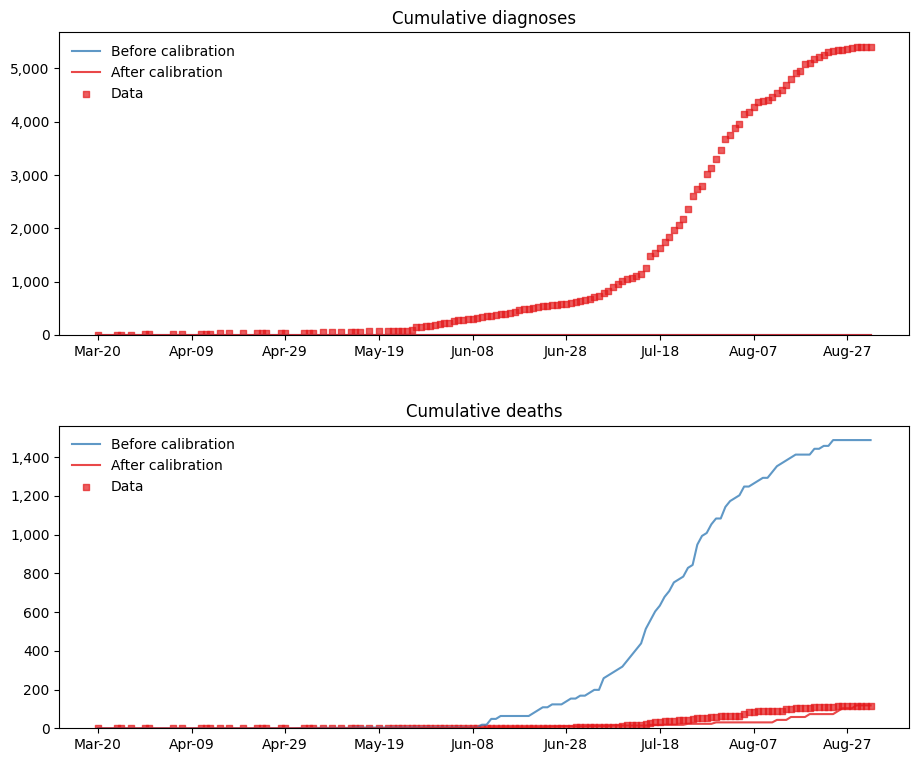

In [59]:
# Plot the results
    calib.plot(to_plot=['cum_diagnoses', 'cum_deaths'])

## The thing is that I want to calibrate the number of contacts within a range -- want to know how to adapt that - as below

In [60]:
# Parameters to calibrate -- format is best, low, high
calib_pars = dict(
    beta           = [pars.beta, 0.005, 0.20],
    rel_death_prob = [pars.rel_death_prob, 0.5, 3.0],
    contacts = dict(h=2,6 s=6,10, w=4,6, c=2,10), 
    
)

if __name__ == '__main__':

    # Run the calibration
    n_trials = 25
    n_workers = 4
    calib = sim.calibrate(calib_pars=calib_pars, n_trials=n_trials, n_workers=n_workers)

SyntaxError: invalid syntax (<ipython-input-60-df40baff2431>, line 5)

In [ ]:
# Plot the results
    calib.plot(to_plot=['cum_diagnoses', 'cum_deaths'])

### run simulation for this default scenario 

In [ ]:
# just take a look at how changing beta changes the trajectory 
sim.run()
scenariofig = sim.plot()  
sim.plot()

In [ ]:
# take a look at the r value 
sim.plot_result('r_eff')

Notes on this run: 

- Smooth trajectory with peak in case numbers in mid-June (full details see col Y of output n_infectious) 
- Case numbers peak at around 35000 
- Deaths are below 1000 (full details see col K of output)
- R eff starts around 3.5 and drops completely to 0 by September (full details see col AH)

### Save output

In [ ]:
sim.save('../outputs/zim-sim_default_scenario_A.sim')
sim.to_excel('../outputs/zim-sim_default_scenario_A.xlsx')

## Scenario B. Country location, pop size and number of contacts (Maincaland) specified

In [ ]:
pars = dict(
    pop_type = 'hybrid', # see documentation - this is a hybrid between random and a data derived model. Later, develop synthpop
    pop_size = 100e3,  # population of the Zim is 15 million. When I despecify this -- population of ... 
    pop_scale= 15, # one agent represents 15 people 
    location = 'Zimbabwe',
    start_day = '2020-03-20',
    end_day = '2020-09-01',
    contacts=dict(h=6, s=6, w=4, c=2),
    #school_ages = [5, 21], 
    #work_ages = [20, 61],
    verbose = 0 # means it won't print all the output 
)


# other things you can re-define in pars include n_days, beta  (As below)

# adapt one by one 

### run simulation for adapted contacts (Manicaland) scenario 

In [ ]:
# just take a look at how changing beta changes the trajectory 
sim2 = cv.Sim(pars)
sim2.run()
scenariofig = sim2.plot()  #  this will only work if I run sim.run() not msim.run()
sim2.plot()

In [ ]:
# take a look at the r value 
sim2.plot_result('r_eff')

Notes on this run: 

- Smooth trajectory with peak in case numbers at the middle of March (full details see col Y of output n_infectious) 
- Case numbers peak at around 4 
- Deaths are below 1! (full details see col K of output)
- R eff starts around 1.2 and drops completely to 0 by May (full details see col AH)

### Save output

In [ ]:
sim.save('../outputs/zim-sim_manicaland_scenario_B.sim')
sim.to_excel('../outputs/zim-sim_manicaland_scenario_B.xlsx')

## Scenario C. Country location, pop size and number of contacts (Maincaland) specified & Beta value adapted

In [ ]:
pars = dict(
    pop_type = 'hybrid', # see documentation - this is a hybrid between random and a data derived model. Later, develop synthpop
    pop_size = 100e3,  # population of the Zim is 15 million. When I despecify this -- population of ... 
    pop_scale= 15, # one agent represents 15 people 
    location = 'Zimbabwe',
    start_day = '2020-03-20',
    end_day = '2020-09-01',
    contacts=dict(h=6, s=6, w=4, c=2),
    #beta_layer  = dict(h=3.0, s=0.6, w=0.6, c=0.3),  # Per-population beta weights; 
    verbose = 0 # means it won't print all the output 
)



In [ ]:
cv.options.set(dpi=100, show=False, close=True) #, verbose=0 # ) # put back in verbose once i've figured out what this does

#change the transmission rate (default beta value is 0.016?) -- you can also change the relative weighting of beta in h,s,w,c in Line 145
cb = cv.change_beta(days=['2020-03-20'], changes=[2.0])  # want to understand better what this is really doing 
# increasing the beta on around 1st August 

sim3 = cv.Sim(pars, interventions=cb, label='With changes in RO from 1st March')

## 4. Run base simulation

In [ ]:
# just take a look at how changing beta changes the trajectory 
sim3.run()
scenariofig = sim3.plot()  #  this will only work if I run sim.run() not msim.run()
sim3.plot()

In [ ]:
# take a look at the r value 
sim3.plot_result('r_eff')

## 7. Save output

In [ ]:
sim3.save('../outputs/zim-sim_change_beta_scenario_C.sim')
sim3.to_excel('../outputs/zim-sim_change_beta_scenario_C.xlsx')

## 8. Save notebook to .html

In [61]:
!jupyter nbconvert ZIM_retro_calibration.ipynb --to html --output ../html_notebooks/ZIM_retro_calibration_010621.html

[NbConvertApp] Converting notebook ZIM_retro_calibration.ipynb to html
[NbConvertApp] Writing 1191495 bytes to ../html_notebooks/ZIM_retro_calibration_010621.html
